# Installing the Ultralytics library, which is used for YOLO V8 object detection models.


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 13.9 MB/s eta 0:00:00


# Cloning the Ultralytics repository from GitHub to the local machine.
# Changing the current directory to the 'ultralytics' directory that was just cloned.
# Installalling the Python package located in the 'ultralytics' directory in editable mode.


In [2]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 22753, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 22753 (delta 10), reused 13 (delta 4), pack-reused 22722
Receiving objects: 100% (22753/22753), 13.49 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (15921/15921), done.
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.24-0.editable-py3-none-any.whl size=22673 sha256=dc192befa3c8abc3f46214930bef3a1d5faca42b267f71685400485fe0ab2ac4
  Stored in directory: /tmp/pip-ephem-wheel-cache-55a9uj3c/wheels/9a/cd/d5/95912172899f8ec640166ff6eef49156b1b00d6b2ade4a3cb1
Successfully built ultralytics
  Attemptin

# Installing the Roboflow library to process our labelled dataset


In [3]:
!pip install roboflow



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 

# 1. Importing the Roboflow library to interact with its API.


# 2. Initialize the Roboflow object with your API key.


# 3. Accessing our workspace named 'yolomadhu' on Roboflow.


# 4. Select version 2 of the project 'object-detection-zhyii'.


# 5. Download the dataset in 'yolov8-obb' format for the selected version.



In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="cOt7tdBIPJhsMk51cs3y")
project = rf.workspace("yolomadhu").project("object-detection-zhyii")
version = project.version(2)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-2 in yolov8-obb:: 100%|██████████| 756/756 [00:00<00:00, 2118.56it/s]


# Loads a YAML file of the YOLO V8 Dataset, modifies its paths for test, train, and validation datasets, and writes the changes back to the file.

In [2]:
import yaml

# Define the file path
file_path = "/content/Object-Detection-2/data.yaml"

# Load the YAML file
with open(file_path, 'r') as file:
  data = yaml.safe_load(file)

# Change the paths
data['test'] = '/content/Object-Detection-2/test/images'
data['train'] = '/content/Object-Detection-2/valid/images'
data['val'] = '/content/Object-Detection-2/train/images'

# Write the changes back to the YAML file
with open(file_path, 'w') as file:
  yaml.dump(data,file)

# This command initiates the training of a YOLOv8s model on a specified dataset for object detection, with configurations for 500 epochs, an image size of 640, and no early stopping.

In [3]:
!yolo task=detect \
mode=train \
model=yolov8s \
data=/content/Object-Detection-2/data.yaml \
epochs=500 \
imgsz=640 \
patience=0

100% 21.5M/21.5M [00:00<00:00, 204MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s, data=/content/Object-Detection-2/data.yaml, epochs=500, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [9]:
file_path = "/content/Object-Detection-2/data.yaml"

# Load the YAML file
with open(file_path, 'r') as file:
  data = yaml.safe_load(file)

# Change the paths
data['test'] = '/content/Object-Detection-2/test/images'
data['train'] = '/content/Object-Detection-2/train/images'
data['val'] = '/content/Object-Detection-2/valid/images'
# Write the changes back to the YAML file
with open(file_path, 'w') as file:
  yaml.dump(data,file)


# Using the best weights from the given folder we are testing and validating the model. The souce path for the validation data is provided and read by the model from data.yaml file.

This command line instruction initiates object detection validation using a pre-trained model specified by its path, on a dataset defined in a YAML file.

In [10]:
!yolo task=detect \
mode=val \
model=/content/ultralytics/runs/detect/train/weights/best.pt \
data=/content/Object-Detection-2/data.yaml

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Object-Detection-2/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.11it/s]
                   all         42         42      0.991          1      0.995      0.886
Speed: 7.7ms preprocess, 24.4ms inference, 0.0ms loss, 14.9ms postprocess per image
Results saved to /content/ultralytics/runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


# Executing YOLO v8 prediction using a pre-trained model on specified test images with a confidence threshold of 0.5, saving crops of detected objects.

In [19]:
!yolo predict model=/content/ultralytics/runs/detect/train/weights/best.pt source='/content/Object-Detection-2/test/images' save_crop conf=0.5

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/28 /content/Object-Detection-2/test/images/Aleve_jpg.rf.80ffe6ae7bf2ccdaa68ff704f8b02bc1.jpg: 640x640 1 Medicine Name, 16.3ms
image 2/28 /content/Object-Detection-2/test/images/Beano_jpg.rf.eb5299b6df3fedd0e4ee357fd525941e.jpg: 640x640 1 Medicine Name, 16.4ms
image 3/28 /content/Object-Detection-2/test/images/Clindasol20_jpg.rf.f8722f69e9ee3462cb4dee2592f5844f.jpg: 640x640 1 Medicine Name, 16.3ms
image 4/28 /content/Object-Detection-2/test/images/Enrichs-11_jpg.rf.c85148268a50d87d95c2ec036464cf69.jpg: 640x640 1 Medicine Name, 16.3ms
image 5/28 /content/Object-Detection-2/test/images/Exlax_jpg.rf.1317e92e6ce1d4b0c7555647cac62ae7.jpg: 640x640 1 Medicine Name, 16.3ms
image 6/28 /content/Object-Detection-2/test/images/Ivypront_JPG_jpg.rf.724a89971fde4536f934f3a6ea25c681.jpg: 640x640 1 Medicine Name, 16.3ms
image 7/2

In [15]:
import os
import matplotlib.image as mpimg

In [17]:
import matplotlib.pyplot as plt

**checking if the validation is done on the images are correct or not.**

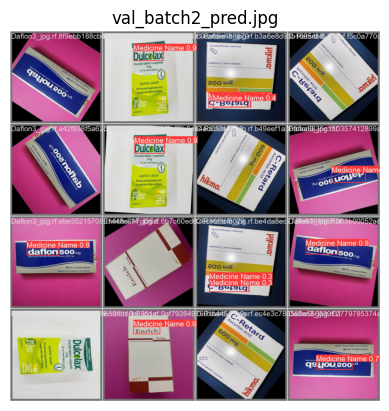

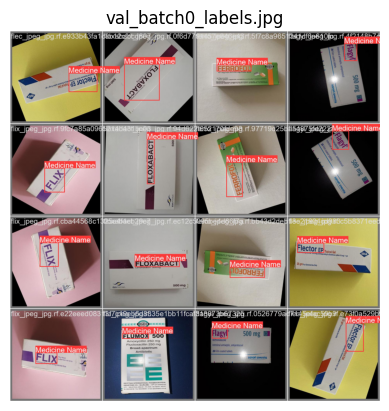

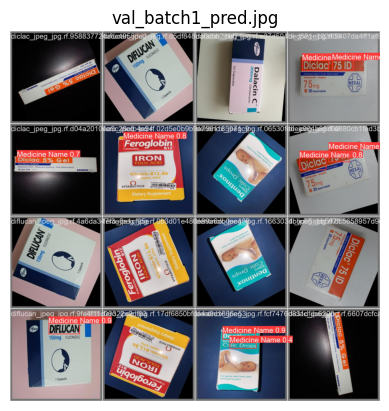

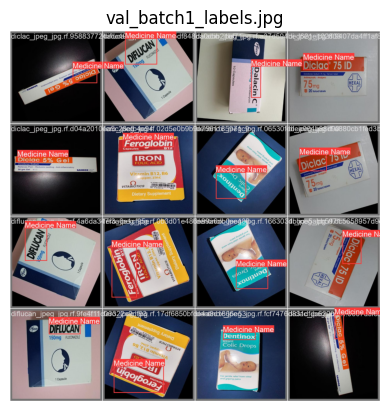

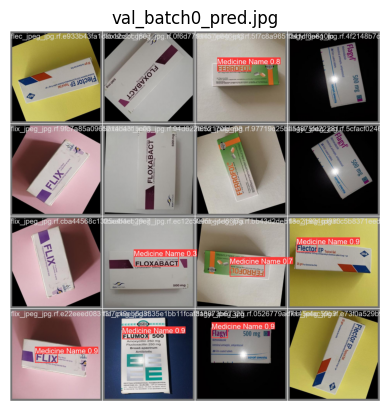

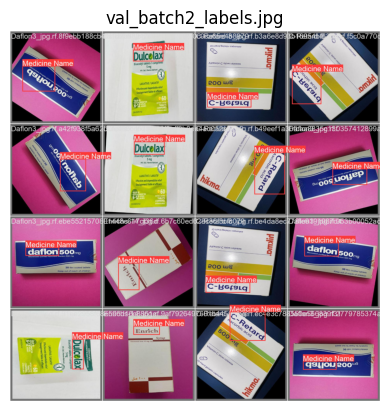

In [18]:
# Define the folder path
folder_path = "/content/ultralytics/runs/detect/val/"

# List all files in the folder
files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in files if file.endswith('.jpg')]

# Display each image
for image_file in image_files:
    # Construct the full path of the image
    image_path = os.path.join(folder_path, image_file)

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(image_file)  # Set the title as the image file name
    plt.axis('off')  # Turn off axis
    plt.show()

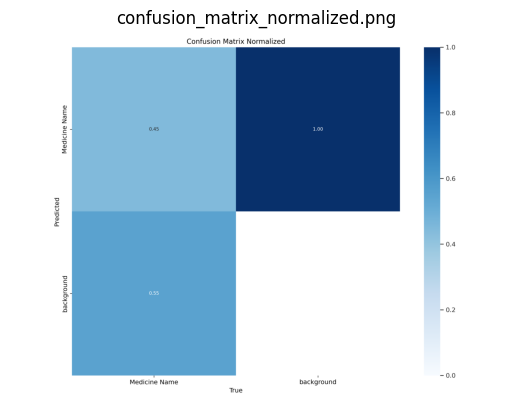

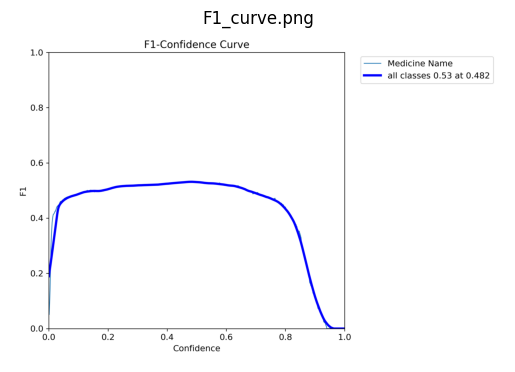

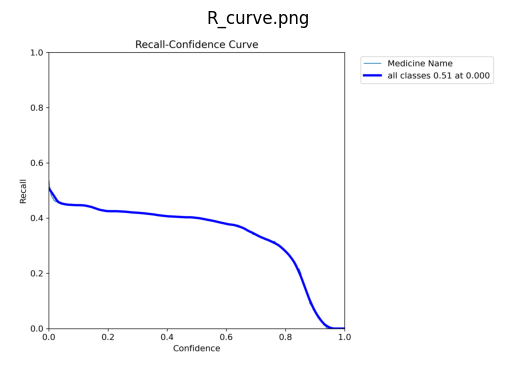

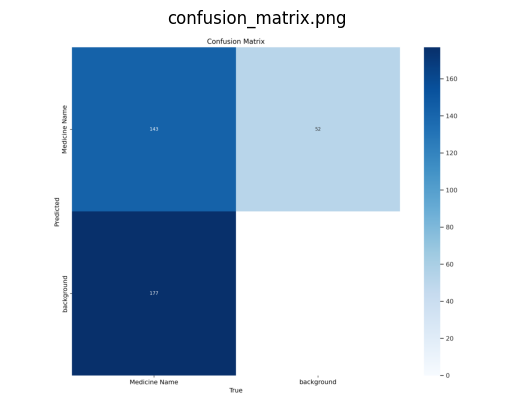

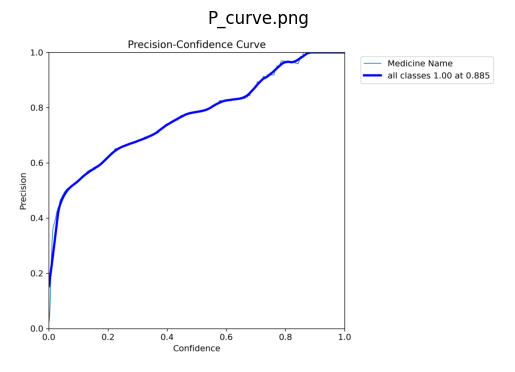

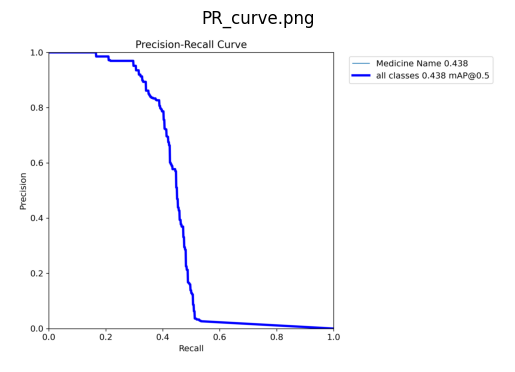

In [20]:
# Define the folder path
folder_path = "/content/ultralytics/runs/detect/val/"

# List all files in the folder
files = os.listdir(folder_path)

# Filter out only the image files
image_files = [file for file in files if file.endswith('.png')]

# Display each image
for image_file in image_files:
    # Construct the full path of the image
    image_path = os.path.join(folder_path, image_file)

    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(image_file)  # Set the title as the image file name
    plt.axis('off')  # Turn off axis
    plt.show()

**Cropping and displaying the cropped images for the detected medicine pckages**

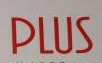

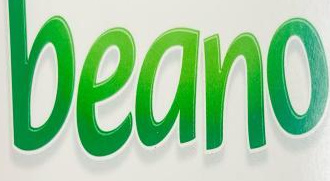

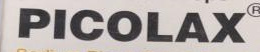

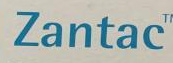

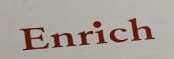

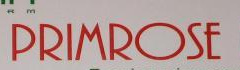

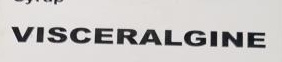

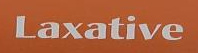

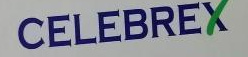

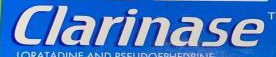

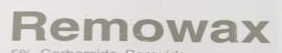

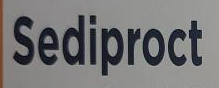

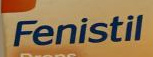

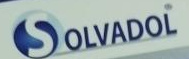

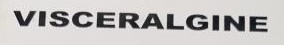

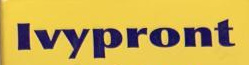

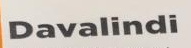

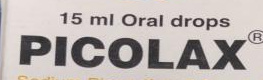

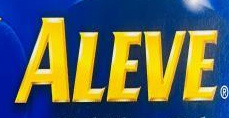

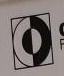

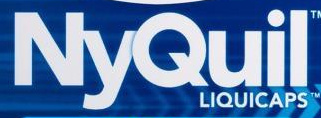

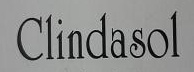

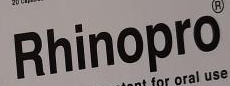

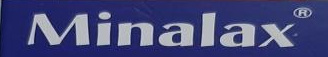

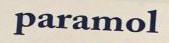

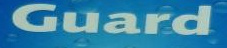

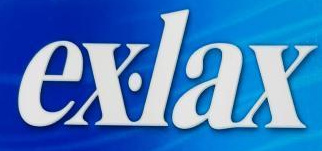

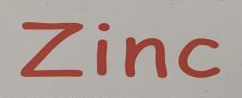

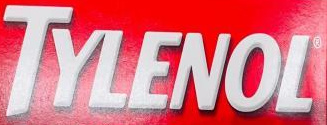

In [21]:
import os
from IPython.display import Image, display

# Path to the result image directory
result_dir = '/content/ultralytics/runs/detect/predict2'

# Path to the cropped images directory
cropped_images_dir = os.path.join(result_dir, 'crops', 'Medicine Name')

# Displaying the result image
result_files = [file for file in os.listdir(result_dir) if file.endswith(('.jpg', '.png'))]

# Displaying the cropped images
if os.path.exists(cropped_images_dir):
    for crop_image in os.listdir(cropped_images_dir):
        if crop_image.endswith('.jpg'):
            display(Image(filename=os.path.join(cropped_images_dir, crop_image)))
            print()
else:
    print("No cropped images found in the directory.")


In [23]:
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [24]:


# Navigate to the directory where your files are stored
os.chdir('/content/ultralytics/runs/')

# List files in the directory
file_list = os.listdir()

# Destination folder in local system where files will be downloaded
local_destination_folder = '/content/drive/MyDrive/output_files'

# Ensure the destination folder exists
if not os.path.exists(local_destination_folder):
    os.makedirs(local_destination_folder)

# Download files
for file_name in file_list:
    # Check if the item is a file (not a folder)
    if os.path.isfile(file_name):
        # Copy the file to the local destination folder
        shutil.copy(file_name, os.path.join(local_destination_folder, file_name))

print("Files downloaded successfully.")

Files downloaded successfully.
